In [93]:
import matplotlib.pyplot as plt
import pandas as pd

movies_data = pd.read_csv(
    "ml-1m/movies.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    names=["MovieID", "Title", "Genres"]
)

ratings_data = pd.read_csv(
    "ml-1m/ratings.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    names=["UserID", "MovieID", "Rating", "Timestamp"]
)

users_data = pd.read_csv(
    "ml-1m/users.dat",
    sep="::",
    engine="python",
    encoding="latin-1",
    names=["UserID", "Gender", "Age", "Occupation", "Zip-code"]
)

In [94]:
print(ratings_data.describe())
print(movies_data.describe())
print(users_data.describe())

             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e+07
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08
25%    1.506000e+03  1.030000e+03  3.000000e+00  9.653026e+08
50%    3.070000e+03  1.835000e+03  4.000000e+00  9.730180e+08
75%    4.476000e+03  2.770000e+03  4.000000e+00  9.752209e+08
max    6.040000e+03  3.952000e+03  5.000000e+00  1.046455e+09
           MovieID
count  3883.000000
mean   1986.049446
std    1146.778349
min       1.000000
25%     982.500000
50%    2010.000000
75%    2980.500000
max    3952.000000
            UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
5

In [95]:
print(ratings_data.info())
print(movies_data.info())
print(users_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null 

### Obtenha uma visão geral dos dados


In [96]:
print(ratings_data.head())
print(movies_data.head())
print(users_data.head())

   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [97]:
print(ratings_data["UserID"].nunique())
print(ratings_data["MovieID"].nunique())

6040
3706


In [98]:
gender_series = users_data['Gender'].value_counts()
gender_series

Gender
M    4331
F    1709
Name: count, dtype: int64

In [99]:
print(users_data['Age'].value_counts())

Age
25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

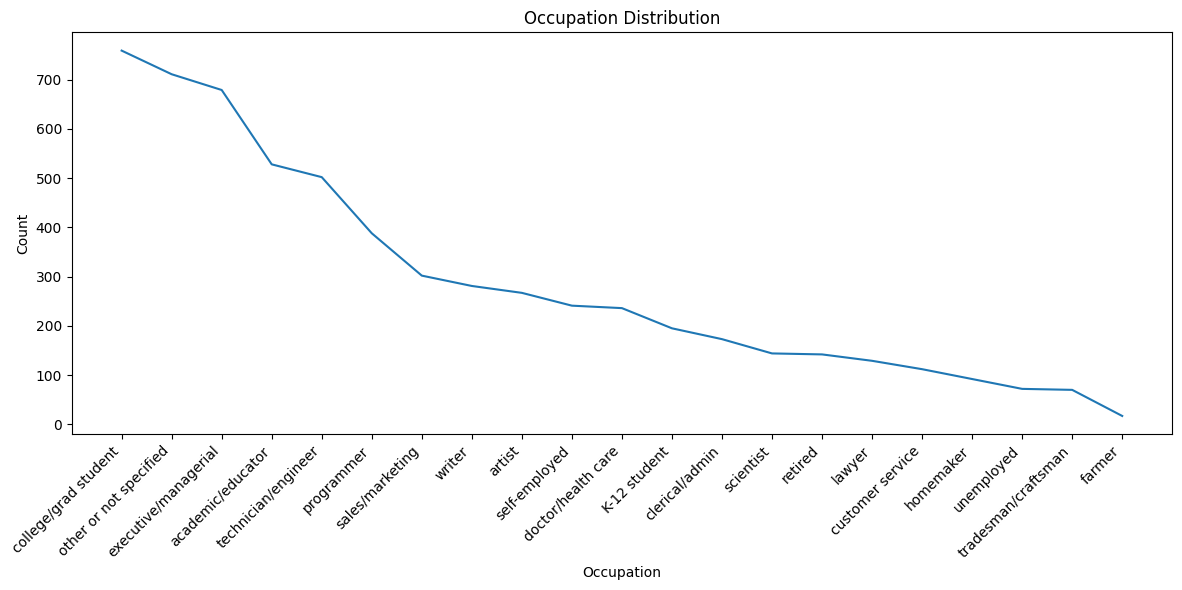

In [111]:
occupation_info = [
    "other or not specified",    # 0
    "academic/educator",         # 1
    "artist",                    # 2
    "clerical/admin",            # 3
    "college/grad student",      # 4
    "customer service",          # 5
    "doctor/health care",        # 6
    "executive/managerial",      # 7
    "farmer",                    # 8
    "homemaker",                 # 9
    "K-12 student",              # 10
    "lawyer",                    # 11
    "programmer",                # 12
    "retired",                   # 13
    "sales/marketing",           # 14
    "scientist",                 # 15
    "self-employed",             # 16
    "technician/engineer",       # 17
    "tradesman/craftsman",       # 18
    "unemployed",                # 19
    "writer"                     # 20
]

occupation_data = users_data['Occupation'].apply(lambda x : occupation_info[int(x)])
occupation_data = occupation_data.value_counts()

plt.figure(figsize=(12, 6))
plt.plot(occupation_data.index, occupation_data.values)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution')
plt.tight_layout()
plt.show

In [101]:
movies_exp = movies_data.copy()
movies_exp['Genre'] = movies_exp['Genres'].str.split("|")
movies_exp = movies_exp.explode('Genre')
movies_exp

,MovieID,Title,Genres,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Children's
...,...,...,...,...
3879,3949,Requiem for a Dream (2000),Drama,Drama
3880,3950,Tigerland (2000),Drama,Drama
3881,3951,Two Family House (2000),Drama,Drama
3882,3952,"Contender, The (2000)",Drama|Thriller,Drama


In [102]:
mr = ratings_data.merge(movies_exp, on="MovieID")
mr = mr.merge(users_data[['UserID', 'Gender']], on='UserID')
genre_by_gender = mr.groupby(['Gender', 'Genre']).size().unstack(fill_value=0)
genre_by_gender

Genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Gender,,,,,,,,,,,,,,,,,,
F,45650,27332,12221,21317,96271,16442,1940,98153,8718,4202,14635,13505,9976,50297,27400,40308,14093,3477
M,211807,106621,31072,50869,260309,63099,5970,256376,27583,14059,61751,28028,30202,97226,129894,149372,54434,17206


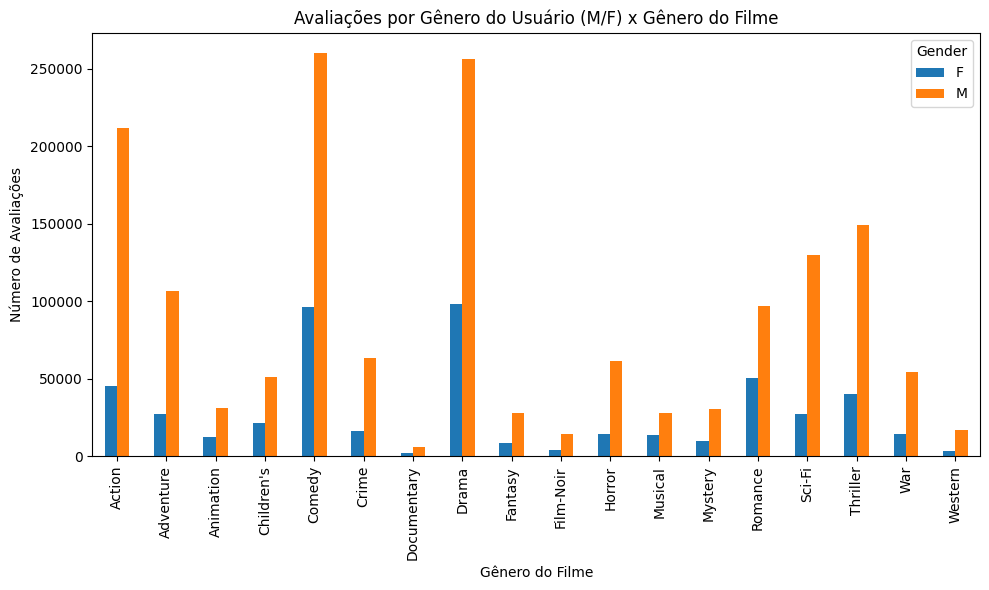

In [103]:
genre_by_gender.T.plot(kind='bar', figsize=(10,6))

plt.xlabel("Gênero do Filme")
plt.ylabel("Número de Avaliações")
plt.title("Avaliações por Gênero do Usuário (M/F) x Gênero do Filme")
plt.tight_layout()
plt.show()

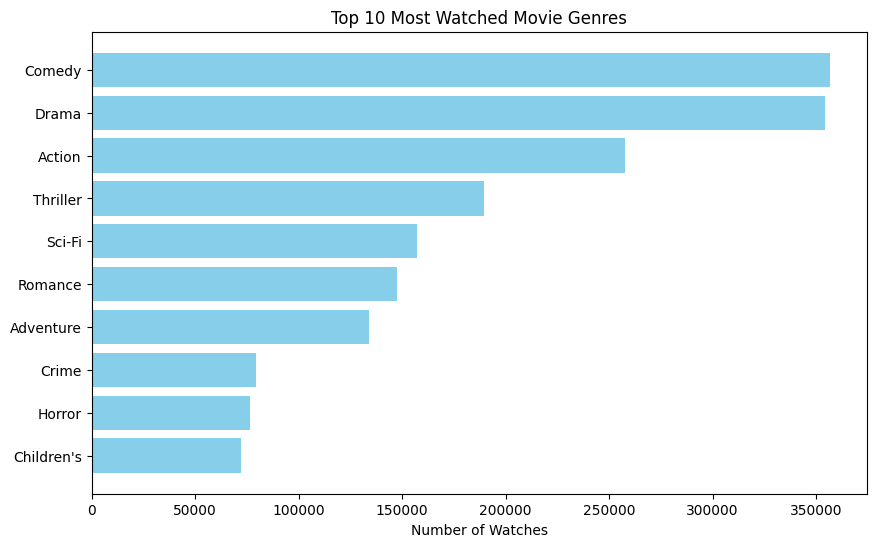

In [ ]:
# Count total watches per genre
genre_counts_total = movies_locale_by_genre.groupby('Genre').size().sort_values(ascending=False)

# Plot top 10 genres
top_genres = genre_counts_total.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_genres.index[::-1], top_genres.values[::-1], color='skyblue')  # horizontal bar
plt.xlabel('Number of Watches')
plt.title('Top 10 Most Watched Movie Genres')
plt.show()


In [ ]:
movies_copy = movies_data[["MovieID", "Title"]].copy()
# Extract the year into a new column
movies_copy['Year'] = movies_copy['Title'].str.extract(r'\((\d{4})\)')[0]

# Convert Year to numeric (optional)
movies_copy['Year'] = pd.to_numeric(movies_copy['Year'], errors='coerce')

# Remove the year from the title
movies_copy['Title'] = movies_copy['Title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

movies_copy = movies_copy.merge(ratings_data[['MovieID', 'UserID', 'Rating']], on='MovieID')
movies_copy = movies_copy.merge(users_data[['UserID', 'Age']], on='UserID')

print(movies_copy)

         MovieID           Title  Year  UserID  Rating  Age
0              1       Toy Story  1995       1       5    1
1              1       Toy Story  1995       6       4   50
2              1       Toy Story  1995       8       4   25
3              1       Toy Story  1995       9       5   25
4              1       Toy Story  1995      10       5   35
...          ...             ...   ...     ...     ...  ...
1000204     3952  Contender, The  2000    5812       4   25
1000205     3952  Contender, The  2000    5831       3   25
1000206     3952  Contender, The  2000    5837       4   25
1000207     3952  Contender, The  2000    5927       1   35
1000208     3952  Contender, The  2000    5998       4   18

[1000209 rows x 6 columns]


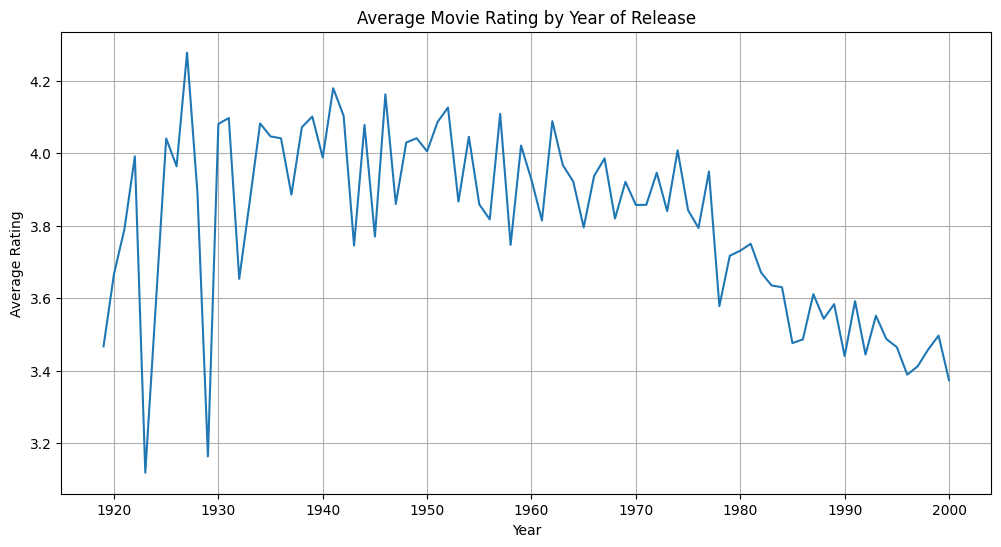

In [105]:
avg_rating_year = movies_copy.groupby('Year')['Rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_rating_year.index, avg_rating_year.values)
plt.title('Average Movie Rating by Year of Release')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid()
plt.show()

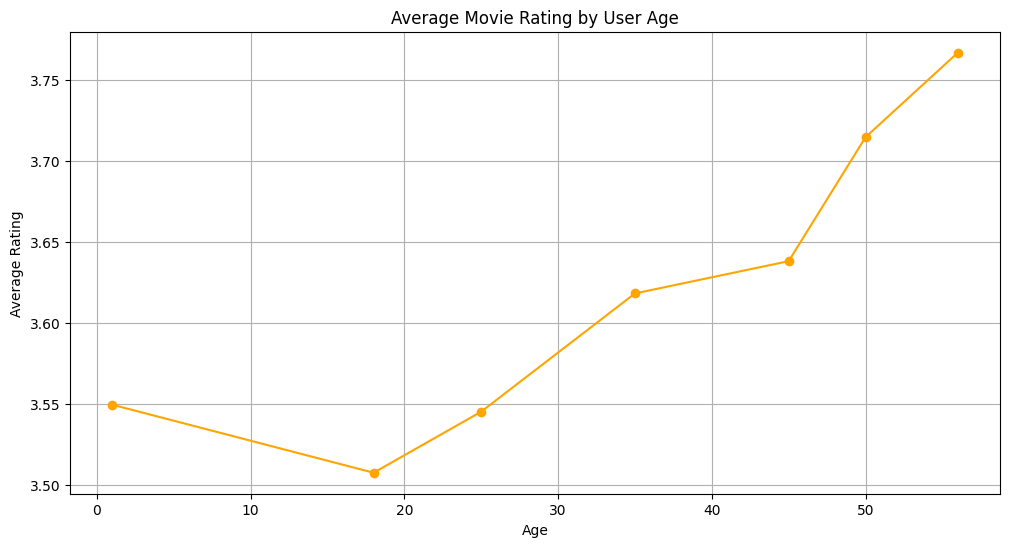

In [106]:
# Average rating per age
avg_rating_age = movies_copy.groupby('Age')['Rating'].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_rating_age.index, avg_rating_age.values, marker='o', color='orange')
plt.title('Average Movie Rating by User Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


Most rated movies:

In [122]:
movie_rating_merge = ratings_data.merge(movies_data, on="MovieID")
rating_counts = movie_rating_merge.groupby(["Rating", "Title"]).size()
rating_counts_sorted = rating_counts.sort_values(ascending=False)
print(rating_counts_sorted.head(10))


Rating  Title                                                
5       American Beauty (1999)                                   1963
        Star Wars: Episode IV - A New Hope (1977)                1826
        Raiders of the Lost Ark (1981)                           1500
        Star Wars: Episode V - The Empire Strikes Back (1980)    1483
        Schindler's List (1993)                                  1475
        Godfather, The (1972)                                    1475
        Shawshank Redemption, The (1994)                         1457
        Matrix, The (1999)                                       1430
        Saving Private Ryan (1998)                               1405
        Sixth Sense, The (1999)                                  1385
dtype: int64


Worst/Best movies:

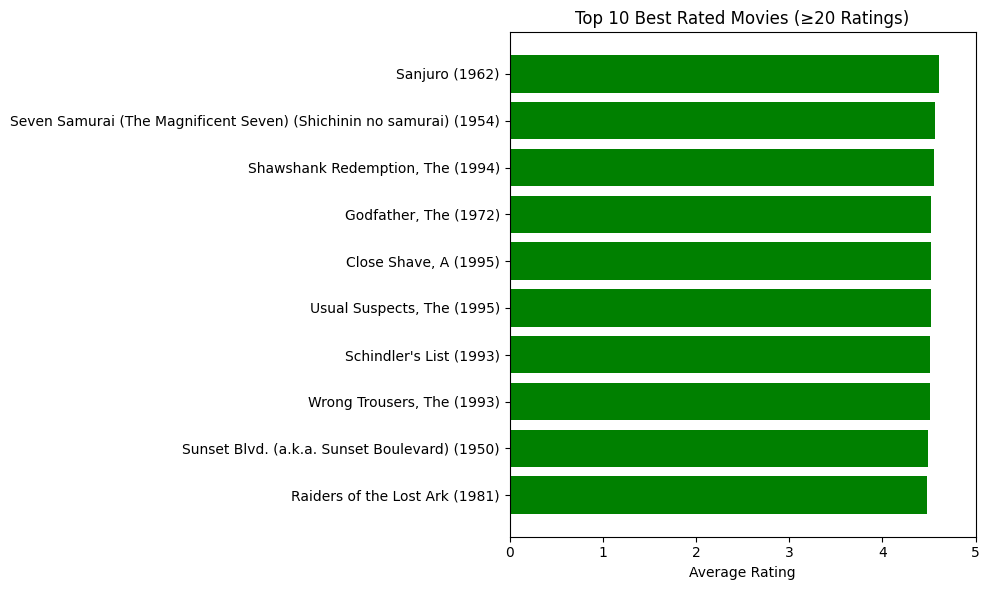

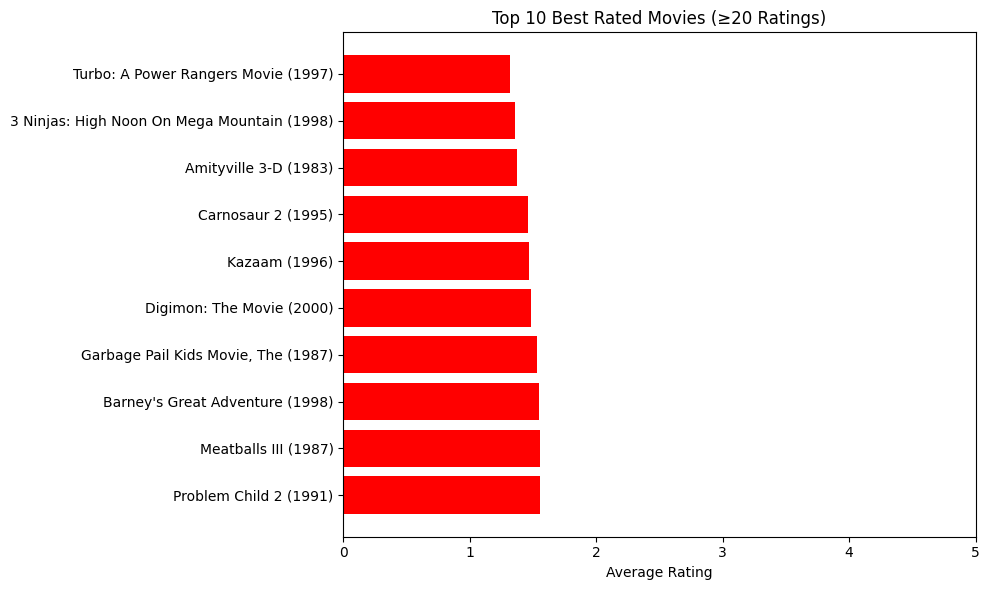

In [129]:
movie_stats = movie_rating_merge.groupby('Title').agg(
    avg_rating=("Rating", "mean"),
    num_ratings=("Rating", "count")
)

movie_stats = movie_stats[movie_stats['num_ratings'] >= 20]

best_movies = movie_stats.sort_values("avg_rating", ascending=False)
worst_movies = movie_stats.sort_values("avg_rating", ascending=True)

top_n = 10
best_top10 = best_movies.head(top_n)
worst_top10 = worst_movies.head(top_n)

plt.figure(figsize=(10,6))
plt.barh(best_top10.index[::-1], best_top10['avg_rating'][::-1], color='green')  # reverse for descending order
plt.xlabel('Average Rating')
plt.title(f'Top {top_n} Best Rated Movies (≥20 Ratings)')
plt.xlim(0, 5)  # assuming rating scale 0-5
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.barh(worst_top10.index[::-1], worst_top10['avg_rating'][::-1], color='red') 
plt.xlabel('Average Rating')
plt.title(f'Top {top_n} Best Rated Movies (≥20 Ratings)')
plt.xlim(0, 5)  # assuming rating scale 0-5
plt.tight_layout()
plt.show()
